# Probability Theory in Python

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import random  # Used for random number generation. 

import scipy.special  # Used for factorial calculations. 
import scipy.stats  # Used for distributions. 

## Ilustrate the Law of Large Numbers (LLN)  [Called "De relative frekvensernas stabilitet" in the book p.14]
1. Simulate 10000 dice throws. 
2. Plot the relative frequency of the number of times three dots occur for 1, 2, ..., 10000 throws.
3. To what number does the relative frequency converge to? What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?
4. Explain what you observe. 

Make sure to create a good pedagogical plot, i.e. include title, x-label and y-label. 

**Hint: For step 1 use the random.choices() function. You should also create an empty list that you append with the relative frequencies for 1, 2, ... 10000 throws.**

In [5]:
# Help about the random.choices function
help(random.choices)

print(random.choices([1, 2, 3, 4, 5, 6,], k=3)) # k is the number of times to draw from the population, population is the list of items to draw from
print(random.choices([1, 2, 3, 4, 5, 6,], k=10))


Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.

[2, 1, 3]
[5, 5, 3, 1, 2, 5, 4, 1, 6, 6]


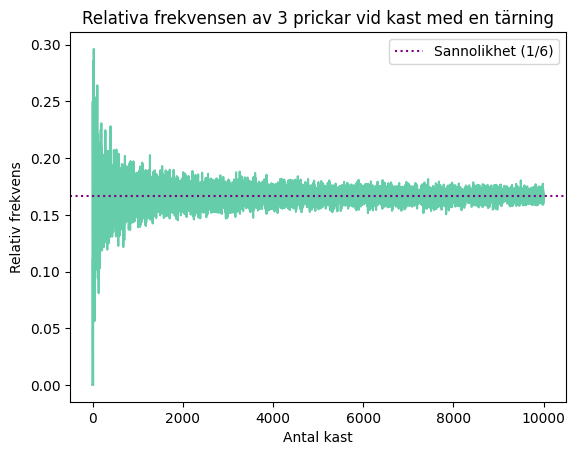

relativ frekvens:  0.1641
sannolikhet(1/6):  0.16666666666666666
den relativa frekvensen konvergerar mot sannolikheten 1/6 när antalet kast ökar
den relativa frekvensen är en skattning av sannolikheten
det är inte samma sak som sannolikheten då den relativa frekvensen är ett värde som beror på antalet kast och beskriver hur ofta 3 prickar förekommer


In [48]:
rel_freq_list = []
#loopar för att simulera kasten
for i in range(1, 10001):
    #simulera kasten i gånger
    simulated_throws = random.choices([1, 2, 3, 4, 5, 6,], k=i)
    #räkna antalet gånger 3 prickar förekommer
    three_dots = simulated_throws.count(3)
    #beräkna den relativa frekvensen
    rel_freq = three_dots / len(simulated_throws) # antalet gånger 3 prickar förekommer dividerat med det totala antalet kast
    rel_freq_list.append(rel_freq) # lägg till den relativa frekvensen i listan

plt.plot(rel_freq_list, color='mediumaquamarine')
plt.title("Relativa frekvensen av 3 prickar vid kast med en tärning")
plt.xlabel("Antal kast")
plt.ylabel("Relativ frekvens")
plt.axhline(y=1/6, color='purple', linestyle=':', label='Sannolikhet (1/6)') # rita en horisontell linje vid y = 1/6
plt.legend()

plt.show()

print("relativ frekvens: ", rel_freq)
print("sannolikhet(1/6): ", 1/6)

print('den relativa frekvensen konvergerar mot sannolikheten 1/6 när antalet kast ökar')
print('den relativa frekvensen är en skattning av sannolikheten')
print('det är inte samma sak som sannolikheten då den relativa frekvensen är ett värde som beror på antalet kast och beskriver hur ofta 3 prickar förekommer')



# Solve exercise 105 in the book. 

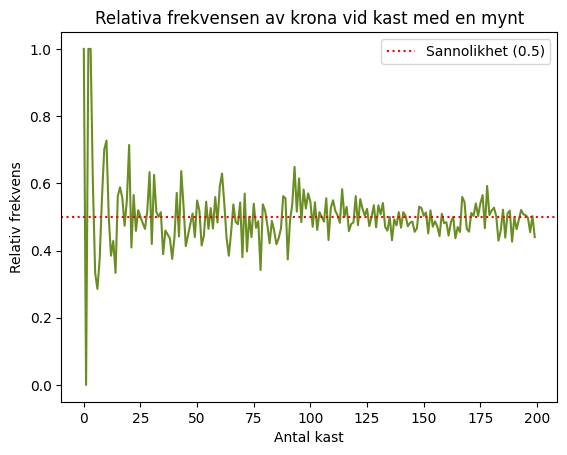

relativ frekvens:  0.44
sannolikhet(0.5):  0.5
den relativa frekvensen konvergerar mot sannolikheten 0.5 när antalet kast ökar
de relativa frekvensernas stabilitet betyder att den relativa frekvensen kommer att stabilisera sig kring sannolikheten 0.5 när antalet kast ökar


In [54]:
#simulera 200 kast med en mynt och räkna antalet gånger du får krona
#plotta den relativa frekvensen av krona som funktion av antalet kast

mynt_rel_freq_list = []

for i in range(1, 201):
    mynt_kast = random.choices(['krona', 'klave'], k=i)
    krona = mynt_kast.count('krona')
    mynt_rel_freq = krona / len(mynt_kast)
    mynt_rel_freq_list.append(mynt_rel_freq)

plt.plot(mynt_rel_freq_list, color='olivedrab')
plt.title("Relativa frekvensen av krona vid kast med en mynt")
plt.xlabel("Antal kast")
plt.ylabel("Relativ frekvens")
plt.axhline(y=0.5, color='red', linestyle=':', label='Sannolikhet (0.5)') # rita en horisontell linje vid y = 0.5
plt.legend()
plt.show()

print("relativ frekvens: ", mynt_rel_freq)
print("sannolikhet(0.5): ", 0.5)

print('den relativa frekvensen konvergerar mot sannolikheten 0.5 när antalet kast ökar')
print('de relativa frekvensernas stabilitet betyder att den relativa frekvensen kommer att stabilisera sig kring sannolikheten 0.5 när antalet kast ökar')


# Calculate 1!, 2!, ..., 12! . What is your conclusion regarding the growth of the factorial function?

In [60]:
for i in range(1, 13):
    print(scipy.special.factorial(i).astype(int))
print('--------------------------------')
print('fakulteten växer mycket snabbt när n ökar')
print('faktorial och fakulteten är inte samma sak') 
print('fakulteten är en funktion som beror på antalet kast och beskriver hur många sätt man kan ordna k st element när man inte tar hänsyn till ordningen')



1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
--------------------------------
fakulteten växer mycket snabbt när n ökar
faktorial och fakulteten är inte samma sak
fakulteten är en funktion som beror på antalet kast och beskriver hur många sätt man kan ordna k st element när man inte tar hänsyn till ordningen


# We know that the binomial coefficients can be used to calculate the number of ways to choose k elements from n without replacement when the order does not matter. We have the formula: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ .

# Now calculate $\binom{6}{2}$ with a built in function and then create your own function (you can use the built in factorial function) and verify that you get the same results. 

In [63]:
#använd den inbyggda funktionen
print((scipy.special.binom(6, 2)).astype(int))


#skapa egen funktion
def binom_func(n, k):
    return (scipy.special.factorial(n) / (scipy.special.factorial(k) * scipy.special.factorial(n-k))).astype(int)
print(binom_func(6, 2))





15
15


# Read the following documentation, note the methods such as rvs, pmf, cdf. These are available for most of the distributions meaning "once you know one of them, you know most". 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html 

In general, for discrete distributions, the probability mass function *(also called density function)*, $p(X = x)$, calculates the probability that the random variable takes a specific value. The distribution function *(also called the cumulative distribution function)* $F(x) = P(X \leq x)$ calculates the probability that a random variable is less than or equal to a value. Random number generation simply means that you generate random numbers from a distribution. The quantile function *(also called: Percent point function or inverse CDF)* we will skip for now and will learn more about that in later chapters. 

# Solve exercise 307, 308, 309 in Python. 

In [ ]:
#cdf är cumulative distribution function, dvs mindre än eller lika med
#rvs är random variabel generation, dvs är random variabeln från den fördelningen
#pmf är probability mass function, dvs är lika med

In [77]:
print('307')
# Slumpvariabeln X är binomialfördelad med n = 12 och p = 0.4. Beräkna sannolikheten att X är mindre än 6.
print("a.Pr(x<=6) = ", "{:.2f}".format(scipy.stats.binom.cdf(6, 12, 0.4)))
#beräkna sannolikheten att X är mindre än 6
print("b.Pr(x<6) = Pr(x<=5) = ", "{:.2f}".format(scipy.stats.binom.cdf(5, 12, 0.4)))
#beräkna sannolikheten att X är lika med 6
print("c.Pr(x=6) = ", "{:.2f}".format(scipy.stats.binom.pmf(6, 12, 0.4)))
#beräkna sannolikheten att X är större än 6
print("d.Pr(x>6) = 1 - Pr(x<=6) = ", "{:.2f}".format(1 - scipy.stats.binom.cdf(6, 12, 0.4)))

print('308')
# Slumpvariabeln X är binomialfördelad med n = 8 och p = 0.25. Beräkna sannolikheten att X är lika med 2.
print("a.Pr(x=2) = ", "{:.2f}".format(scipy.stats.binom.pmf(2, 8, 0.25)))
# är mindre än 2
print("b.Pr(x<2) = Pr(x<=1) = ", "{:.2f}".format(scipy.stats.binom.cdf(1, 8, 0.25)))
# är större eller lika med 2
print("c.Pr(x>=2) = 1 - Pr(x<=1) = ", "{:.2f}".format(1 - scipy.stats.binom.cdf(1, 8, 0.25)))

print('309')
#en tredjedel av alla barn i förskoleåldern får hubudlöss. Slumpmässigt väljer vi tre barn. Vad är sannolikheten att exakt två av de valda barnen får hubudlöss?
print("Pr(x=2) = ", "{:.2f}".format(scipy.stats.binom.pmf(2, 3, 1/3)))




307
a.Pr(x<=6) =  0.84
b.Pr(x<6) = Pr(x<=5) =  0.67
c.Pr(x=6) =  0.18
d.Pr(x>6) = 1 - Pr(x<=6) =  0.16
308
a.Pr(x=2) =  0.31
b.Pr(x<2) = Pr(x<=1) =  0.37
c.Pr(x>=2) = 1 - Pr(x<=1) =  0.63
309
Pr(x=2) =  0.22


# Solve exercise 314 in Python. 

In [78]:
print('314')
# X är poissonfördelad med mu = 2. Beräkna sannolikheten att X är mindre än eller lika med 4.
print("a. Pr(x<=4) = ", "{:.2f}".format(scipy.stats.poisson.cdf(4, 2)))
# mindre än 4
print("b. Pr(x<4) = Pr(x<=3) = ", "{:.2f}".format(scipy.stats.poisson.cdf(3, 2)))
# lika med 4
print("c. Pr(x=4) = ", "{:.2f}".format(scipy.stats.poisson.pmf(4, 2)))
# större än 4
print("d. Pr(x>4) = 1 - Pr(x<=4) = ", "{:.2f}".format(1 - scipy.stats.poisson.cdf(4, 2)))



314
a. Pr(x<=4) =  0.95
b. Pr(x<4) = Pr(x<=3) =  0.86
c. Pr(x=4) =  0.09
d. Pr(x>4) = 1 - Pr(x<=4) =  0.05


# Simulate 10000 samples from bin(n= 100, p = 0.35) and plot a histogram. Then simulate 10000 samples from bin(n= 100, p = 0.9) and plot a histogram. In the plots, what is the "middle" of the plot? Which plot has a "wider" distribution?

# What is the theoretical/true Expected Value and Variance of the two distributions? (see p.89 in the book for formulas.)

# Calculate the mean and variance of the two samples that you simulated, use the functions np.mean() and np.var(). Explain your observations . 

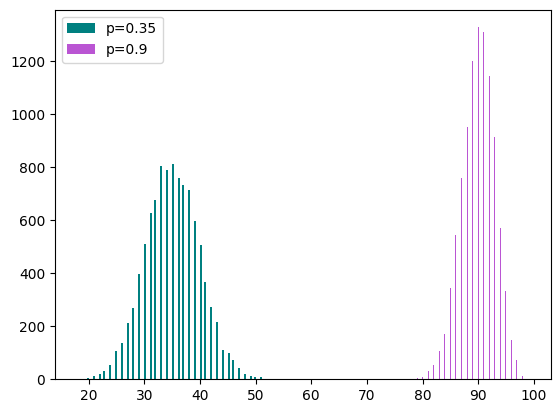

Teoretiskt E(X) och Var(X) för binomialfördelning med p=0.35: 35.0 och 22.75
Teoretiskt E(X) och Var(X) för binomialfördelning med p=0.9: 90.0 och 9.0
Empiriskt E(X) och Var(X) för binomialfördelning med p=0.35: 34.98 och 23.21
Empiriskt E(X) och Var(X) för binomialfördelning med p=0.9: 89.99 och 8.96


In [89]:
x = scipy.stats.binom.rvs(100, 0.35, size = 10000) #binomialfördelning med n=100 och p=0.35
y = scipy.stats.binom.rvs(100, 0.9, size = 10000)

plt.hist(x, bins=100, color='teal', label='p=0.35')
plt.hist(y, bins=100, color='mediumorchid', label='p=0.9')
plt.legend()
plt.show()

# Mitten av varje histogram representerar väntevärdet, det mest sannolika utfallet
# Binomialfördelningen med p=0.35 har bredast spridning, vilket innebär att dess värden är mer utspridda kring väntevärdet


# Teoretiskt väntevärde och varians (p.89 i boken och chatgpt hjälp)
mean_035, var_035 = scipy.stats.binom.stats(100, 0.35)
mean_09, var_09 = scipy.stats.binom.stats(100, 0.9)

print("Teoretiskt E(X) och Var(X) för binomialfördelning med p=0.35:", mean_035, "och", var_035)
print("Teoretiskt E(X) och Var(X) för binomialfördelning med p=0.9:", mean_09, "och", var_09)

#empiriskt väntevärde och varians
print("Empiriskt E(X) och Var(X) för binomialfördelning med p=0.35:", np.mean(x).round(2), "och", np.var(x).round(2))
print("Empiriskt E(X) och Var(X) för binomialfördelning med p=0.9:", np.mean(y).round(2), "och", np.var(y).round(2))



In [ ]:
#Teoretiskt väntevärde och varians är de värden som förväntas baserat på de matematiska egenskaperna hos binomialfördelningen (n och p).
#Empiriskt väntevärde och varians beräknas från de simulerade data (de faktiska observationerna). Dessa värden bör ligga nära de teoretiska värdena när antalet simuleringar är stort.